In [0]:
# All required imports

import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras

(training_images, training_labels), (testing_images, testing_labels) = keras.datasets.cifar10.load_data()

label_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of testing images: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)




Text(0.5, 1.0, 'Image 31815: Label #[9] (Image of Truck)')

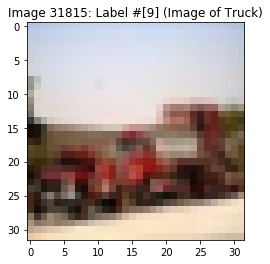

In [57]:
print("Shape of training images: " + str(training_images.shape))
print("Shape of training labels: " + str(training_labels.shape))
print("Shape of testing images: " + str(testing_images.shape))
print("Shape of testing labels: " + str(testing_labels.shape))
print("\n")
r = np.random.randint(50001)
plt.imshow(training_images[r])
plt.title('Image {}: Label #{} (Image of {})'.format(r, training_labels[r], label_names[training_labels[r][0]]))

In [0]:
# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def acc_curve(history):
  train_acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_acc, label="Training Accuracy")
  plt.plot(x_axis, val_acc, label="Validation Accuracy")
  plt.ylabel('Accuracy Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

In [59]:
# Start creating neural network
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical

Nasir_Net = Sequential() #Custom Model

# One hot encoding for training output
output_training = to_categorical(training_labels, len(label_names))

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 15, 15, 64)        0         
__________

In [60]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 18s 403us/step - loss: 14.4969 - acc: 0.1004 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 2/15
45000/45000 [==============================] - 17s 377us/step - loss: 14.4988 - acc: 0.1005 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 3/15
45000/45000 [==============================] - 17s 378us/step - loss: 14.4988 - acc: 0.1005 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 4/15
45000/45000 [==============================] - 17s 376us/step - loss: 14.4988 - acc: 0.1005 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 5/15
45000/45000 [==============================] - 17s 376us/step - loss: 14.4988 - acc: 0.1005 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 6/15
45000/45000 [==============================] - 17s 372us/step - loss: 14.4988 - acc: 0.1005 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 7/15
45000/45000 [==============================] - 17s 375us/step - loss: 14.4988 - acc: 0.1005 - 

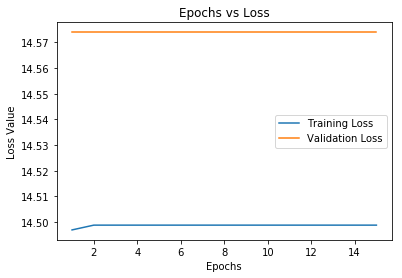

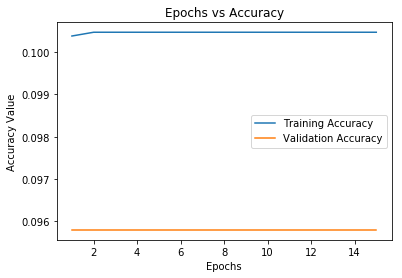

In [62]:
loss_curve(x)
acc_curve(x)

In [63]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 1s 148us/step
Accuracy on test data: 10.0%


In [67]:
# Rebuilding Network with Batch Normalization
from keras.layers.normalization import BatchNormalization

Nasir_Net = Sequential() #Custom Model with Batch Normalization

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_50 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_51 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
__________

In [68]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 30s 675us/step - loss: 1.2206 - acc: 0.5723 - val_loss: 1.3307 - val_acc: 0.5696
Epoch 2/15
45000/45000 [==============================] - 27s 603us/step - loss: 0.7919 - acc: 0.7246 - val_loss: 1.2547 - val_acc: 0.5930
Epoch 3/15
45000/45000 [==============================] - 27s 595us/step - loss: 0.6325 - acc: 0.7827 - val_loss: 1.0544 - val_acc: 0.6812
Epoch 4/15
45000/45000 [==============================] - 27s 593us/step - loss: 0.5064 - acc: 0.8251 - val_loss: 0.9698 - val_acc: 0.7434
Epoch 5/15
45000/45000 [==============================] - 26s 585us/step - loss: 0.4055 - acc: 0.8610 - val_loss: 1.1947 - val_acc: 0.7080
Epoch 6/15
45000/45000 [==============================] - 26s 577us/step - loss: 0.3212 - acc: 0.8900 - val_loss: 0.9816 - val_acc: 0.7070
Epoch 7/15
45000/45000 [==============================] - 26s 568us/step - loss: 0.2577 - acc: 0.9104 - val_loss: 1.0

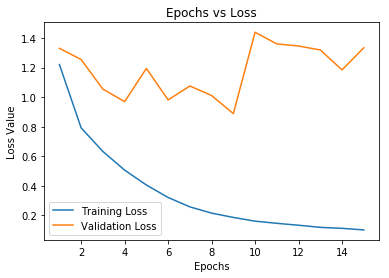

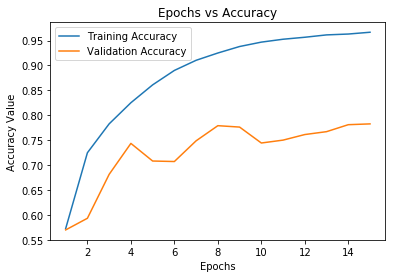

In [69]:
loss_curve(x)
acc_curve(x)

In [70]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 190us/step
Accuracy on test data: 77.21000000000001%


Original Pixel Value: 59


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean Subtracted Pixel Value: -82.20508


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean Subtracted and STD Normalized Pixel Value: -2.0215852


Text(0.5, 1.0, 'Mean Subtracted and STD Normalized Image')

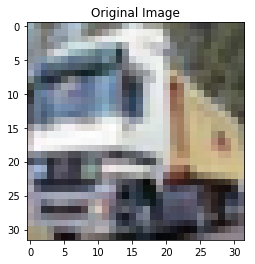

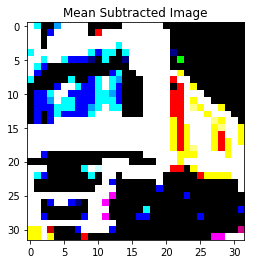

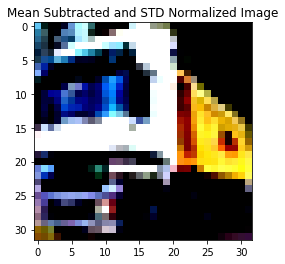

In [125]:
plt.figure()
plt.imshow(training_images[1])
plt.title("Original Image")

print("Original Pixel Value: " + str(training_images[0][0][0][0]))

training_images = training_images.astype('float32')
testing_images = testing_images.astype('float32')

training_images_mean = training_images.mean(axis=(1,2), keepdims=True)
testing_images_mean = testing_images.mean(axis=(1,2), keepdims=True)

training_images -= training_images_mean
testing_images -= testing_images_mean

print("Mean Subtracted Pixel Value: " + str(training_images[0][0][0][0]))

plt.figure()
plt.imshow(training_images[1])
plt.title("Mean Subtracted Image")

training_images_std = training_images.std(axis=(1,2), keepdims=True)
testing_images_std = testing_images.std(axis=(1,2), keepdims=True)

training_images /= training_images_std
testing_images /= testing_images_std

print("Mean Subtracted and STD Normalized Pixel Value: " + str(training_images[0][0][0][0]))

plt.figure()
plt.imshow(training_images[1])
plt.title("Mean Subtracted and STD Normalized Image")

In [126]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 27s 592us/step - loss: 0.2642 - acc: 0.9223 - val_loss: 1.4685 - val_acc: 0.7624
Epoch 2/15
45000/45000 [==============================] - 26s 576us/step - loss: 0.1623 - acc: 0.9477 - val_loss: 1.5220 - val_acc: 0.7506
Epoch 3/15
45000/45000 [==============================] - 26s 570us/step - loss: 0.1291 - acc: 0.9575 - val_loss: 0.9351 - val_acc: 0.7646
Epoch 4/15
45000/45000 [==============================] - 25s 565us/step - loss: 0.1083 - acc: 0.9650 - val_loss: 1.2547 - val_acc: 0.7780
Epoch 5/15
45000/45000 [==============================] - 25s 563us/step - loss: 0.0974 - acc: 0.9690 - val_loss: 1.2980 - val_acc: 0.7674
Epoch 6/15
45000/45000 [==============================] - 25s 559us/step - loss: 0.0903 - acc: 0.9711 - val_loss: 1.2123 - val_acc: 0.7762
Epoch 7/15
45000/45000 [==============================] - 25s 555us/step - loss: 0.0858 - acc: 0.9733 - val_loss: 1.8

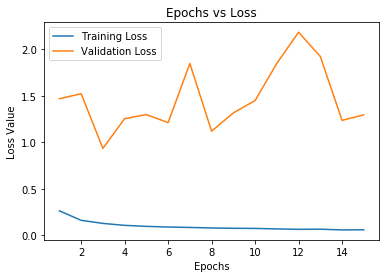

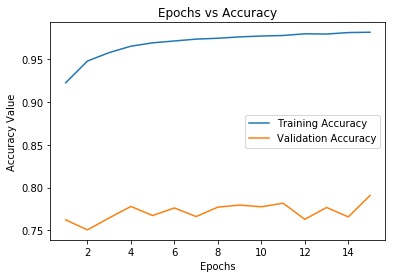

In [127]:
loss_curve(x)
acc_curve(x)

In [128]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 153us/step
Accuracy on test data: 77.34%


In [135]:
# Rebuilding Network with random_uniform initialization
from keras.layers.normalization import BatchNormalization

Nasir_Net = Sequential() #Custom Model with random_uniform initialization

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3), kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3), kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same', kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3), kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512, kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512, kernel_initializer='random_uniform', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_72 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
__________

In [136]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 34s 761us/step - loss: 1.2339 - acc: 0.5749 - val_loss: 1.4644 - val_acc: 0.5586
Epoch 2/15
45000/45000 [==============================] - 30s 676us/step - loss: 0.8035 - acc: 0.7244 - val_loss: 1.8382 - val_acc: 0.5686
Epoch 3/15
45000/45000 [==============================] - 30s 659us/step - loss: 0.6345 - acc: 0.7818 - val_loss: 1.1218 - val_acc: 0.6964
Epoch 4/15
45000/45000 [==============================] - 29s 647us/step - loss: 0.5132 - acc: 0.8248 - val_loss: 0.9939 - val_acc: 0.7336
Epoch 5/15
45000/45000 [==============================] - 30s 657us/step - loss: 0.4098 - acc: 0.8603 - val_loss: 1.3676 - val_acc: 0.6562
Epoch 6/15
45000/45000 [==============================] - 29s 655us/step - loss: 0.3171 - acc: 0.8911 - val_loss: 0.9428 - val_acc: 0.7596
Epoch 7/15
45000/45000 [==============================] - 30s 656us/step - loss: 0.2611 - acc: 0.9096 - val_loss: 0.9

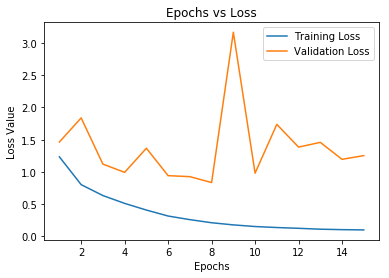

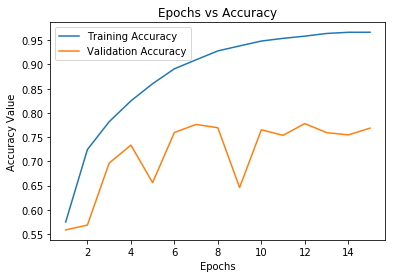

In [137]:
loss_curve(x)
acc_curve(x)

In [138]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 202us/step
Accuracy on test data: 76.99000000000001%


In [139]:
# Rebuilding Network with random_uniform initialization
from keras.layers.normalization import BatchNormalization

Nasir_Net = Sequential() #Custom Model with random_uniform initialization

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3), kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3), kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same', kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3), kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512, kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512, kernel_initializer='glorot_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_78 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_44 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_79 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
__________

In [140]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 32s 709us/step - loss: 1.2169 - acc: 0.5796 - val_loss: 1.4099 - val_acc: 0.5876
Epoch 2/15
45000/45000 [==============================] - 29s 653us/step - loss: 0.7929 - acc: 0.7279 - val_loss: 2.1756 - val_acc: 0.5270
Epoch 3/15
45000/45000 [==============================] - 29s 640us/step - loss: 0.6128 - acc: 0.7871 - val_loss: 0.7668 - val_acc: 0.7454
Epoch 4/15
45000/45000 [==============================] - 29s 642us/step - loss: 0.4879 - acc: 0.8319 - val_loss: 0.9717 - val_acc: 0.6984
Epoch 5/15
45000/45000 [==============================] - 29s 636us/step - loss: 0.3835 - acc: 0.8672 - val_loss: 0.8920 - val_acc: 0.7482
Epoch 6/15
45000/45000 [==============================] - 29s 637us/step - loss: 0.3043 - acc: 0.8953 - val_loss: 0.8755 - val_acc: 0.7746
Epoch 7/15
45000/45000 [==============================] - 29s 640us/step - loss: 0.2407 - acc: 0.9167 - val_loss: 0.9

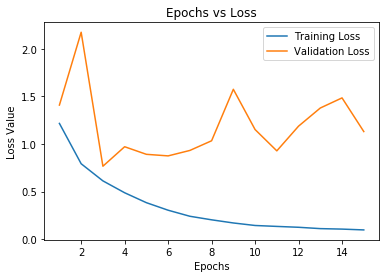

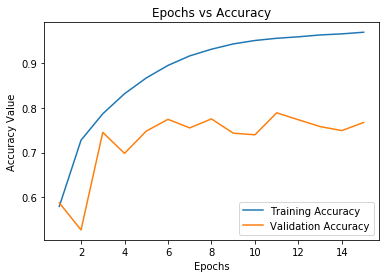

In [141]:
loss_curve(x)
acc_curve(x)

In [142]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 189us/step
Accuracy on test data: 76.23%


In [148]:
# Rebuilding Network with ones initialization
from keras.layers.normalization import BatchNormalization

Nasir_Net = Sequential() #Custom Model with ones

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3), kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3), kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same', kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3), kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512, kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512, kernel_initializer='ones', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_99 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_62 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_100 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
__________

In [149]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 36s 789us/step - loss: 2.3561 - acc: 0.1194 - val_loss: 2.4143 - val_acc: 0.1168
Epoch 2/15
45000/45000 [==============================] - 31s 682us/step - loss: 2.3184 - acc: 0.1351 - val_loss: 2.3289 - val_acc: 0.1528
Epoch 3/15
45000/45000 [==============================] - 31s 681us/step - loss: 2.2870 - acc: 0.1487 - val_loss: 2.3430 - val_acc: 0.1430
Epoch 4/15
45000/45000 [==============================] - 30s 672us/step - loss: 2.2655 - acc: 0.1497 - val_loss: 2.3539 - val_acc: 0.1680
Epoch 5/15
45000/45000 [==============================] - 31s 680us/step - loss: 2.2465 - acc: 0.1587 - val_loss: 2.3561 - val_acc: 0.1318
Epoch 6/15
45000/45000 [==============================] - 31s 679us/step - loss: 2.2175 - acc: 0.1650 - val_loss: 2.2650 - val_acc: 0.1414
Epoch 7/15
45000/45000 [==============================] - 30s 671us/step - loss: 2.1755 - acc: 0.1629 - val_loss: 2.1

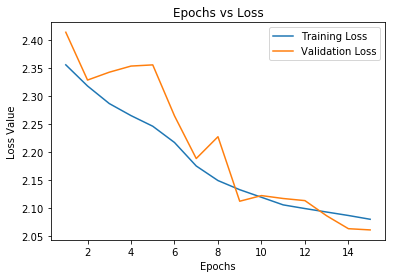

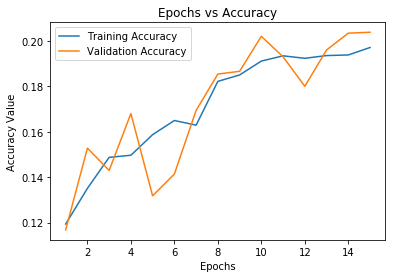

In [150]:
loss_curve(x)
acc_curve(x)

In [151]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 194us/step
Accuracy on test data: 20.880000000000003%


In [152]:
# Rebuilding Network with lecun_normal initialization
from keras.layers.normalization import BatchNormalization

Nasir_Net = Sequential() #Custom Model with lecun_normal

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3), kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3), kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Conv2D(64,(3,3), padding='same', kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3), kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512, kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512, kernel_initializer='lecun_normal', bias_initializer='zero'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_106 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_68 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_107 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
__________

In [153]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 34s 753us/step - loss: 1.1998 - acc: 0.5866 - val_loss: 1.1247 - val_acc: 0.6230
Epoch 2/15
45000/45000 [==============================] - 30s 659us/step - loss: 0.7790 - acc: 0.7314 - val_loss: 0.9351 - val_acc: 0.7070
Epoch 3/15
45000/45000 [==============================] - 30s 659us/step - loss: 0.6042 - acc: 0.7906 - val_loss: 0.8388 - val_acc: 0.7360
Epoch 4/15
45000/45000 [==============================] - 30s 657us/step - loss: 0.4781 - acc: 0.8351 - val_loss: 0.8683 - val_acc: 0.7532
Epoch 5/15
45000/45000 [==============================] - 30s 656us/step - loss: 0.3700 - acc: 0.8721 - val_loss: 1.1264 - val_acc: 0.7408
Epoch 6/15
45000/45000 [==============================] - 29s 654us/step - loss: 0.2933 - acc: 0.8993 - val_loss: 1.0445 - val_acc: 0.7266
Epoch 7/15
45000/45000 [==============================] - 29s 654us/step - loss: 0.2376 - acc: 0.9189 - val_loss: 1.2

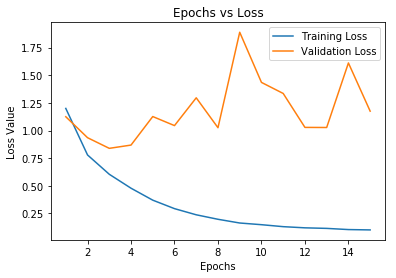

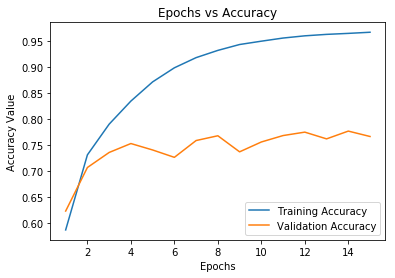

In [154]:
loss_curve(x)
acc_curve(x)

In [155]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 190us/step
Accuracy on test data: 76.48%


In [158]:
# Rebuilding Network with Dropout

Nasir_Net = Sequential() #Custom Model with Dropout

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
              
# Compiling Network
Nasir_Net.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_77 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_117 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_78 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_118 (Activation)  (None, 30, 30, 32)        0         
___________________________

In [159]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 36s 807us/step - loss: 1.6710 - acc: 0.4335 - val_loss: 1.4179 - val_acc: 0.5320
Epoch 2/15
45000/45000 [==============================] - 30s 664us/step - loss: 1.2079 - acc: 0.5842 - val_loss: 1.0711 - val_acc: 0.6502
Epoch 3/15
45000/45000 [==============================] - 30s 673us/step - loss: 1.0730 - acc: 0.6345 - val_loss: 0.9323 - val_acc: 0.6906
Epoch 4/15
45000/45000 [==============================] - 31s 687us/step - loss: 1.0024 - acc: 0.6614 - val_loss: 0.8499 - val_acc: 0.7162
Epoch 5/15
45000/45000 [==============================] - 30s 671us/step - loss: 0.9538 - acc: 0.6796 - val_loss: 0.9213 - val_acc: 0.7044
Epoch 6/15
45000/45000 [==============================] - 30s 671us/step - loss: 0.9150 - acc: 0.6963 - val_loss: 0.8385 - val_acc: 0.7358
Epoch 7/15
45000/45000 [==============================] - 30s 666us/step - loss: 0.8820 - acc: 0.7052 - val_loss: 0.9

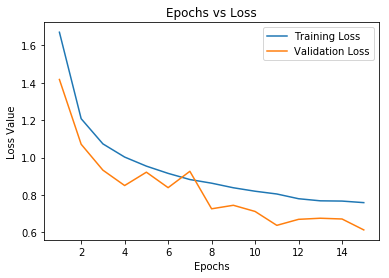

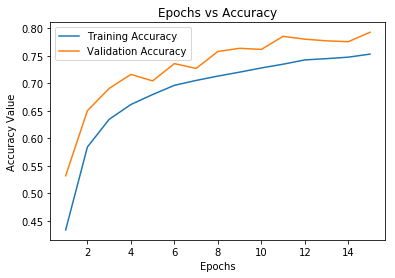

In [160]:
loss_curve(x)
acc_curve(x)

In [161]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 193us/step
Accuracy on test data: 79.17%


In [163]:
# Rebuilding Network with different learning rate
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with Dropout

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         
custom_rmsprop = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=None, decay=0.0)
# Compiling Network
Nasir_Net.compile(optimizer=custom_rmsprop,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_89 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_131 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_90 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_132 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 15, 15, 32)        0         
__________

In [164]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 37s 812us/step - loss: 1.6047 - acc: 0.4565 - val_loss: 1.2670 - val_acc: 0.5778
Epoch 2/15
45000/45000 [==============================] - 31s 680us/step - loss: 1.1784 - acc: 0.6025 - val_loss: 1.0388 - val_acc: 0.6624
Epoch 3/15
45000/45000 [==============================] - 30s 676us/step - loss: 1.0693 - acc: 0.6437 - val_loss: 0.8523 - val_acc: 0.7072
Epoch 4/15
45000/45000 [==============================] - 30s 677us/step - loss: 1.0033 - acc: 0.6666 - val_loss: 0.8988 - val_acc: 0.7106
Epoch 5/15
45000/45000 [==============================] - 31s 680us/step - loss: 0.9617 - acc: 0.6801 - val_loss: 0.9113 - val_acc: 0.7178
Epoch 6/15
45000/45000 [==============================] - 31s 680us/step - loss: 0.9382 - acc: 0.6879 - val_loss: 0.7844 - val_acc: 0.7352
Epoch 7/15
45000/45000 [==============================] - 30s 676us/step - loss: 0.9098 - acc: 0.6986 - val_loss: 0.7

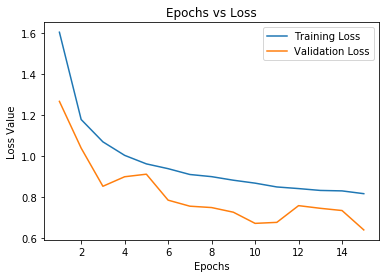

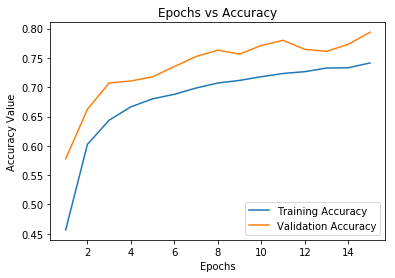

In [165]:
loss_curve(x)
acc_curve(x)

In [166]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 204us/step
Accuracy on test data: 78.78%


In [167]:
# Rebuilding Network with SGD
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with SGD

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         

# Compiling Network
Nasir_Net.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_95 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_138 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_96 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_139 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 32)        0         
__________

In [168]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 35s 776us/step - loss: 2.0927 - acc: 0.2824 - val_loss: 1.8819 - val_acc: 0.3374
Epoch 2/15
45000/45000 [==============================] - 29s 635us/step - loss: 1.6500 - acc: 0.4064 - val_loss: 1.7450 - val_acc: 0.4008
Epoch 3/15
45000/45000 [==============================] - 28s 631us/step - loss: 1.5039 - acc: 0.4615 - val_loss: 1.8800 - val_acc: 0.3516
Epoch 4/15
45000/45000 [==============================] - 28s 628us/step - loss: 1.3892 - acc: 0.5055 - val_loss: 1.5776 - val_acc: 0.4458
Epoch 5/15
45000/45000 [==============================] - 28s 629us/step - loss: 1.3030 - acc: 0.5387 - val_loss: 1.3510 - val_acc: 0.5248
Epoch 6/15
45000/45000 [==============================] - 28s 625us/step - loss: 1.2299 - acc: 0.5638 - val_loss: 1.3281 - val_acc: 0.5326
Epoch 7/15
45000/45000 [==============================] - 28s 630us/step - loss: 1.1800 - acc: 0.5840 - val_loss: 1.1

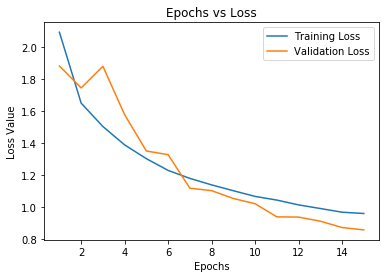

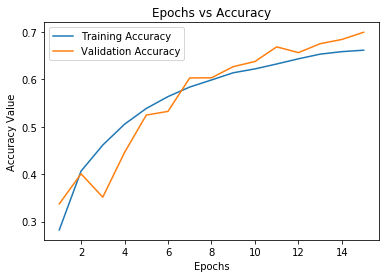

In [169]:
loss_curve(x)
acc_curve(x)

In [170]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 211us/step
Accuracy on test data: 69.06%


In [171]:
# Rebuilding Network with Adam
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with Adam

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         

# Compiling Network
Nasir_Net.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_101 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_145 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_102 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
activation_146 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 32)        0         
__________

In [172]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 40s 883us/step - loss: 1.6839 - acc: 0.4172 - val_loss: 1.1380 - val_acc: 0.5832
Epoch 2/15
45000/45000 [==============================] - 32s 720us/step - loss: 1.2079 - acc: 0.5742 - val_loss: 1.1338 - val_acc: 0.6158
Epoch 3/15
45000/45000 [==============================] - 32s 722us/step - loss: 1.0614 - acc: 0.6281 - val_loss: 0.9659 - val_acc: 0.6596
Epoch 4/15
45000/45000 [==============================] - 33s 723us/step - loss: 0.9623 - acc: 0.6668 - val_loss: 0.8702 - val_acc: 0.7002
Epoch 5/15
45000/45000 [==============================] - 33s 723us/step - loss: 0.8999 - acc: 0.6872 - val_loss: 0.7488 - val_acc: 0.7408
Epoch 6/15
45000/45000 [==============================] - 32s 720us/step - loss: 0.8478 - acc: 0.7065 - val_loss: 0.7086 - val_acc: 0.7484
Epoch 7/15
45000/45000 [==============================] - 32s 720us/step - loss: 0.8003 - acc: 0.7208 - val_loss: 0.6

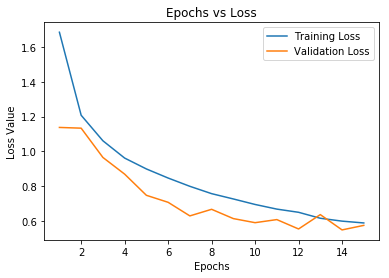

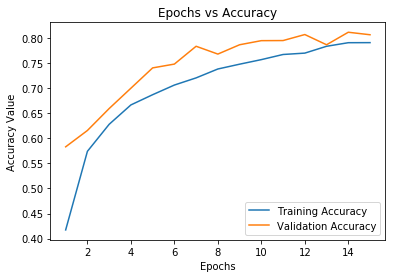

In [173]:
loss_curve(x)
acc_curve(x)

In [174]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 209us/step
Accuracy on test data: 79.93%


In [175]:
# Rebuilding Network with Nadam
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with Nadam

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         

# Compiling Network
Nasir_Net.compile(optimizer='Nadam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_107 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_152 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_108 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
activation_153 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
__________

In [176]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 44s 987us/step - loss: 1.6203 - acc: 0.4368 - val_loss: 1.0885 - val_acc: 0.6138
Epoch 2/15
45000/45000 [==============================] - 36s 803us/step - loss: 1.1764 - acc: 0.5885 - val_loss: 0.9031 - val_acc: 0.6800
Epoch 3/15
45000/45000 [==============================] - 36s 804us/step - loss: 1.0302 - acc: 0.6411 - val_loss: 0.9087 - val_acc: 0.6822
Epoch 4/15
45000/45000 [==============================] - 36s 799us/step - loss: 0.9500 - acc: 0.6706 - val_loss: 0.7329 - val_acc: 0.7432
Epoch 5/15
45000/45000 [==============================] - 36s 797us/step - loss: 0.8842 - acc: 0.6907 - val_loss: 0.7283 - val_acc: 0.7466
Epoch 6/15
45000/45000 [==============================] - 35s 785us/step - loss: 0.8334 - acc: 0.7089 - val_loss: 0.6559 - val_acc: 0.7734
Epoch 7/15
45000/45000 [==============================] - 36s 792us/step - loss: 0.7896 - acc: 0.7259 - val_loss: 0.6

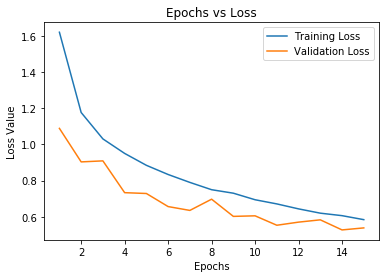

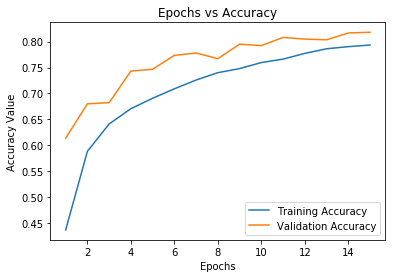

In [177]:
loss_curve(x)
acc_curve(x)

In [178]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 226us/step
Accuracy on test data: 80.38%


In [179]:
# Rebuilding Network with Nadam changed parameters
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with Nadam changed parameters

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         
p = keras.optimizers.Nadam(lr=0.008, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.01)

# Compiling Network
Nasir_Net.compile(optimizer=p,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_113 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_159 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_114 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
activation_160 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 15, 15, 32)        0         
__________

In [180]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=32,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 44s 975us/step - loss: 1.6145 - acc: 0.4448 - val_loss: 1.1158 - val_acc: 0.6166
Epoch 2/15
45000/45000 [==============================] - 36s 793us/step - loss: 1.1920 - acc: 0.5846 - val_loss: 1.0013 - val_acc: 0.6568
Epoch 3/15
45000/45000 [==============================] - 36s 791us/step - loss: 1.0806 - acc: 0.6298 - val_loss: 0.8012 - val_acc: 0.7206
Epoch 4/15
45000/45000 [==============================] - 35s 787us/step - loss: 1.0163 - acc: 0.6526 - val_loss: 1.0212 - val_acc: 0.6506
Epoch 5/15
45000/45000 [==============================] - 35s 787us/step - loss: 0.9536 - acc: 0.6739 - val_loss: 0.8533 - val_acc: 0.7032
Epoch 6/15
45000/45000 [==============================] - 35s 783us/step - loss: 0.9080 - acc: 0.6924 - val_loss: 0.7856 - val_acc: 0.7266
Epoch 7/15
45000/45000 [==============================] - 35s 785us/step - loss: 0.8632 - acc: 0.7066 - val_loss: 0.7

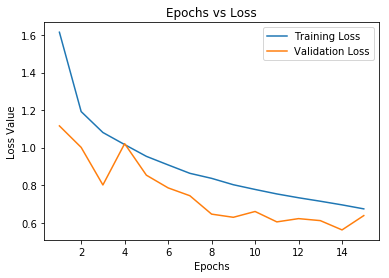

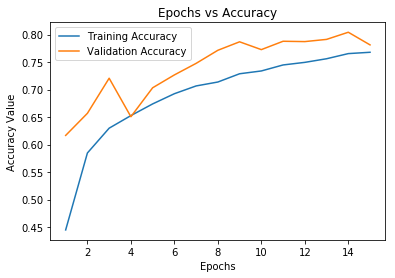

In [181]:
loss_curve(x)
acc_curve(x)

In [182]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 209us/step
Accuracy on test data: 77.55%


In [183]:
# Rebuilding Network with Nadam
from keras import optimizers

Nasir_Net = Sequential() #Custom Model with Nadam

# Architecture of Network
Nasir_Net.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))
    
Nasir_Net.add(Conv2D(32,(3,3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Conv2D(64,(3,3), padding='same'))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Conv2D(64,(3, 3)))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(MaxPooling2D(pool_size=(2,2)))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Flatten())
Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dense(512))
Nasir_Net.add(BatchNormalization())
Nasir_Net.add(Activation('relu'))

Nasir_Net.add(Dropout(0.5))

Nasir_Net.add(Dense(len(label_names)))
Nasir_Net.add(Activation('softmax'))
         

# Compiling Network
Nasir_Net.compile(optimizer='Nadam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
Nasir_Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_119 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_166 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_120 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
activation_167 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
__________

In [184]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=128,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 28s 624us/step - loss: 1.6571 - acc: 0.4242 - val_loss: 1.3367 - val_acc: 0.5342
Epoch 2/15
45000/45000 [==============================] - 21s 461us/step - loss: 1.1515 - acc: 0.5947 - val_loss: 1.1656 - val_acc: 0.6034
Epoch 3/15
45000/45000 [==============================] - 21s 459us/step - loss: 0.9891 - acc: 0.6544 - val_loss: 0.8029 - val_acc: 0.7154
Epoch 4/15
45000/45000 [==============================] - 21s 462us/step - loss: 0.8875 - acc: 0.6890 - val_loss: 0.8962 - val_acc: 0.6944
Epoch 5/15
45000/45000 [==============================] - 21s 458us/step - loss: 0.8292 - acc: 0.7102 - val_loss: 0.7676 - val_acc: 0.7370
Epoch 6/15
45000/45000 [==============================] - 21s 458us/step - loss: 0.7725 - acc: 0.7299 - val_loss: 0.7780 - val_acc: 0.7366
Epoch 7/15
45000/45000 [==============================] - 21s 465us/step - loss: 0.7339 - acc: 0.7415 - val_loss: 0.7

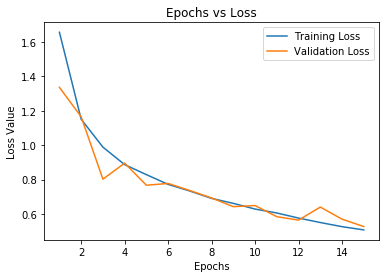

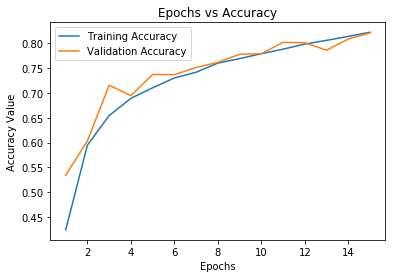

In [185]:
loss_curve(x)
acc_curve(x)

In [186]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 213us/step
Accuracy on test data: 81.39%


In [188]:
x = Nasir_Net.fit(training_images,
                  output_training,
                  batch_size=512,
                  epochs=15,
                  validation_split=0.1,
                  verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 20s 448us/step - loss: 1.8452 - acc: 0.3666 - val_loss: 2.2823 - val_acc: 0.3148
Epoch 2/15
45000/45000 [==============================] - 11s 234us/step - loss: 1.3218 - acc: 0.5365 - val_loss: 1.4572 - val_acc: 0.5144
Epoch 3/15
45000/45000 [==============================] - 10s 233us/step - loss: 1.1173 - acc: 0.6067 - val_loss: 0.9591 - val_acc: 0.6484
Epoch 4/15
45000/45000 [==============================] - 10s 233us/step - loss: 0.9913 - acc: 0.6527 - val_loss: 0.9122 - val_acc: 0.6804
Epoch 5/15
45000/45000 [==============================] - 11s 233us/step - loss: 0.9027 - acc: 0.6831 - val_loss: 0.8570 - val_acc: 0.7012
Epoch 6/15
45000/45000 [==============================] - 10s 233us/step - loss: 0.8367 - acc: 0.7079 - val_loss: 0.7990 - val_acc: 0.7222
Epoch 7/15
45000/45000 [==============================] - 11s 233us/step - loss: 0.7795 - acc: 0.7278 - val_loss: 0.8

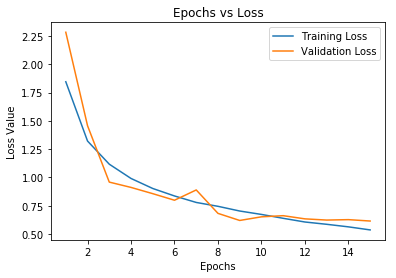

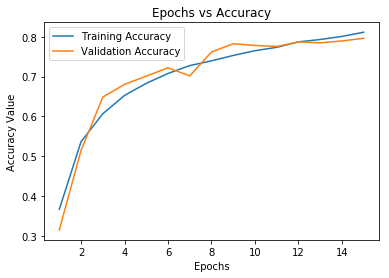

In [189]:
loss_curve(x)
acc_curve(x)

In [190]:
output_testing = to_categorical(testing_labels, len(label_names))

score = Nasir_Net.evaluate(testing_images, output_testing, batch_size=32)
print("Accuracy on test data: " + str(score[1] * 100) + "%")

10000/10000 [==============================] - 2s 203us/step
Accuracy on test data: 78.93%
